In [49]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cross_validation import train_test_split

import xgboost as xgb

In [50]:
PATH_TO_DATA = '../data/'

In [51]:
y = pd.read_csv(PATH_TO_DATA + 'y_train.csv')['time'].values
 
train = pd.read_csv(PATH_TO_DATA + 'x_train.csv')
test = pd.read_csv(PATH_TO_DATA + 'x_test.csv')

_______

In [52]:
train.head()

,m,k,n,cacheL1IsShared,cacheL1Size,cacheL2IsShared,cacheL2Size,cacheL3IsShared,cacheL3Size,cacheL1Threads,...,SeqCopy_15MB_by256,SeqCopy_16MB_by256,SeqCopy_20MB_by256,SeqCopy_21MB_by256,SeqCopy_32MB_by256,SeqCopy_48MB_by256,SeqCopy_64MB_by256,SeqCopy_72MB_by256,SeqCopy_96MB_by256,SeqCopy_128MB_by256
0,2500,3500,5000,0,32,0,256,1,10240,2,...,5504.6,5871.6,5454.5,5201.8,5236.4,5724.8,5236.4,5236.4,6165.1,5120
1,2500,4000,4500,0,32,0,256,1,10240,2,...,5504.6,5871.6,5454.5,5201.8,5236.4,5724.8,5236.4,5236.4,6165.1,5120
2,2500,4000,5000,0,32,0,256,1,10240,2,...,5504.6,5871.6,5454.5,5201.8,5236.4,5724.8,5236.4,5236.4,6165.1,5120
3,2500,4500,5000,0,32,0,256,1,10240,2,...,5504.6,5871.6,5454.5,5201.8,5236.4,5724.8,5236.4,5236.4,6165.1,5120
4,2500,5000,5000,0,32,0,256,1,10240,2,...,5504.6,5871.6,5454.5,5201.8,5236.4,5724.8,5236.4,5236.4,6165.1,5120


In [53]:
type(train['n'][0])

numpy.int64

In [54]:
train.describe()

,m,k,n,cacheL1IsShared,cacheL1Size,cacheL2IsShared,cacheL2Size,cacheL3IsShared,cacheL3Size,cacheL1Threads,...,SeqCopy_15MB_by256,SeqCopy_16MB_by256,SeqCopy_20MB_by256,SeqCopy_21MB_by256,SeqCopy_32MB_by256,SeqCopy_48MB_by256,SeqCopy_64MB_by256,SeqCopy_72MB_by256,SeqCopy_96MB_by256,SeqCopy_128MB_by256
count,4993.000000,4993.000000,4993.00000,4993.000000,4993.000000,4993.000000,4993.000000,4993,4993.000000,4993.000000,...,4993.000000,4993.000000,4993.000000,4993.000000,4993.000000,4993.000000,4993.000000,4993.000000,4993.000000,4993.000000
mean,2334.908872,3416.002403,4278.65011,0.110955,31.770879,0.284398,1037.023032,1,2757.601442,1.697977,...,1621.255498,1621.588384,1596.146385,1612.031324,1611.807731,1606.438734,1604.371200,1612.451552,1644.013879,1601.620328
std,965.277107,958.595081,758.97199,0.314108,10.725541,0.451172,1278.887099,0,2707.943529,0.599237,...,2147.862345,2160.137753,2118.671953,2142.922839,2142.368387,2113.398015,2128.514083,2138.750232,2179.267134,2127.031880
min,300.000000,700.000000,900.00000,0.000000,8.000000,0.000000,256.000000,1,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1500.000000,2500.000000,4000.00000,0.000000,32.000000,0.000000,256.000000,1,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2000.000000,3500.000000,4500.00000,0.000000,32.000000,0.000000,256.000000,1,3072.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3000.000000,4000.000000,5000.00000,0.000000,32.000000,1.000000,2048.000000,1,4096.000000,2.000000,...,3302.800000,3490.900000,3272.700000,3436.400000,3522.900000,3490.900000,3490.900000,3302.800000,3522.900000,3522.900000
max,5000.000000,5000.000000,5000.00000,1.000000,64.000000,1.000000,6144.000000,1,10240.000000,6.000000,...,7156.000000,7045.900000,6605.500000,6935.800000,6458.700000,6605.500000,6458.700000,6605.500000,7045.900000,7045.900000


> 6 не числовых фичей

#### выделим не числовые значения 

In [55]:
# текстовые фичи
cols = []
for i in train.columns.values:
    if type(train[i][0])==np.str:
        cols.append(i)

In [56]:
print ('string features:', cols)

string features: ['memFreq', 'memType', 'memtRFC', 'os', 'cpuFull', 'cpuArch']


In [57]:
train[cols].head()

,memFreq,memType,memtRFC,os,cpuFull,cpuArch
0,800.5,DDR3-SDRAM PC3-12800,1023,Windows 7 Professional Professional Media Cent...,Intel(R) Core(TM) i7-3820 CPU @ 3.60GHz,Sandy Bridge-E
1,800.5,DDR3-SDRAM PC3-12800,1023,Windows 7 Professional Professional Media Cent...,Intel(R) Core(TM) i7-3820 CPU @ 3.60GHz,Sandy Bridge-E
2,800.5,DDR3-SDRAM PC3-12800,1023,Windows 7 Professional Professional Media Cent...,Intel(R) Core(TM) i7-3820 CPU @ 3.60GHz,Sandy Bridge-E
3,800.5,DDR3-SDRAM PC3-12800,1023,Windows 7 Professional Professional Media Cent...,Intel(R) Core(TM) i7-3820 CPU @ 3.60GHz,Sandy Bridge-E
4,800.5,DDR3-SDRAM PC3-12800,1023,Windows 7 Professional Professional Media Cent...,Intel(R) Core(TM) i7-3820 CPU @ 3.60GHz,Sandy Bridge-E


_____

### Обработаем их

In [58]:
a = train.memFreq.values

In [59]:
np.unique(a)

array(['132.9', '199.6', '200', '200.7', '332.5', '333', '333.4', '333.6',
       '333.9', '334.3', '339.2', '351.6', '399', '399.1', '399.6', '400',
       '400.7', '400.8', '401.3', '465.5', '532.1', '532.2', '532.4',
       '548.1', '561.5', '653.1', '665.2', '665.3', '666.6', '666.7',
       '666.8', '669.1', '686.8', '796.5', '798', '798.2', '798.3',
       '798.8', '799.8', '800', '800.1', '800.2', '800.5', '824.2', '99.7',
       'None'], dtype=object)

In [60]:
len(np.unique(a))

46

(array([  531.,     0.,     0.,     0.,     0.,     0.,    77.,     0.,
           94.,     0.,     0.,     0.,   219.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,   626.,    70.,     0.,     0.,
          739.,     0.,     0.,     0.,    37.,     0.,     0.,     0.,
          337.,    70.,    69.,     0.,     0.,     0.,     0.,    35.,
         1131.,    29.,     0.,     0.,     0.,     0.,     0.,     0.,
          918.,    11.]),
 array([   0.   ,   16.484,   32.968,   49.452,   65.936,   82.42 ,
          98.904,  115.388,  131.872,  148.356,  164.84 ,  181.324,
         197.808,  214.292,  230.776,  247.26 ,  263.744,  280.228,
         296.712,  313.196,  329.68 ,  346.164,  362.648,  379.132,
         395.616,  412.1  ,  428.584,  445.068,  461.552,  478.036,
         494.52 ,  511.004,  527.488,  543.972,  560.456,  576.94 ,
         593.424,  609.908,  626.392,  642.876,  659.36 ,  675.844,
         692.328,  708.812,  725.296,  741.78 ,  758.264,  774.748

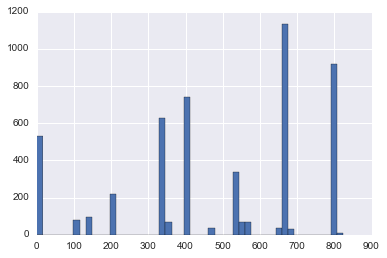

In [61]:
a[a=='None'] = 0
plt.hist(a.astype(float), bins = 50)

In [62]:
# просто переведем данные в числовой формат и заменим в трейне значения числами

a = train.memFreq.values
a[a=='None'] = 0
train.memFreq = a.astype(float) 

# то же и для теста 
a = test.memFreq.values
a[a=='None'] = 0
test.memFreq = a.astype(float)

In [63]:
# удалим из cols  memFreq теперь потому что в нем ток числа
cols.remove('memFreq')

In [64]:
cols

['memType', 'memtRFC', 'os', 'cpuFull', 'cpuArch']

____

In [65]:
a = train.memType.values
tmp = np.unique(a)
print (tmp, len(tmp))

['DDR-SDRAM PC-1600' 'DDR-SDRAM PC-2100' 'DDR-SDRAM PC-3200'
 'DDR-SDRAM PC3200' 'DDR2-SDRAM PC2-3200' 'DDR2-SDRAM PC2-5300'
 'DDR2-SDRAM PC2-5400' 'DDR2-SDRAM PC2-5600' 'DDR2-SDRAM PC2-6400'
 'DDR3-SDRAM PC3-10400' 'DDR3-SDRAM PC3-10600' 'DDR3-SDRAM PC3-10700'
 'DDR3-SDRAM PC3-11000' 'DDR3-SDRAM PC3-12700' 'DDR3-SDRAM PC3-12800'
 'DDR3-SDRAM PC3-13200' 'DDR3-SDRAM PC3-6400' 'DDR3-SDRAM PC3-7400'
 'DDR3-SDRAM PC3-8500' 'DDR3-SDRAM PC3-8800' 'DDR3-SDRAM PC3-9000'
 'FB-DDR2 PC2-5300' 'None'] 23


In [66]:
# https://ru.wikipedia.org/wiki/DDR_SDRAM

peak_transfer_rate = {
    'DDR-SDRAM PC-1600': 1600,
    'DDR-SDRAM PC-2100': 2133,
    'DDR-SDRAM PC-3200': 3200,
    'DDR-SDRAM PC3200': 3200,
    
    'DDR2-SDRAM PC2-3200': 3200,
    'DDR2-SDRAM PC2-5300': 5300,
    'DDR2-SDRAM PC2-5400': 5400,
    'DDR2-SDRAM PC2-5600': 5600,
    'DDR2-SDRAM PC2-6400': 6400,


    'DDR3-SDRAM PC3-6400': 6400,
    'DDR3-SDRAM PC3-7400': 7400, 
    'DDR3-SDRAM PC3-8500': 8500,
    'DDR3-SDRAM PC3-8800': 8800, 
    'DDR3-SDRAM PC3-9000': 9033, 
    
    'DDR3-SDRAM PC3-10400': 10400,
    'DDR3-SDRAM PC3-10600': 10600,
    'DDR3-SDRAM PC3-10700': 10700,
    'DDR3-SDRAM PC3-11000': 11000,
    'DDR3-SDRAM PC3-12700': 12700,
    'DDR3-SDRAM PC3-12800': 12800,
    'DDR3-SDRAM PC3-13200': 13200,
    
    
    'FB-DDR2 PC2-5300': 5300,
    'None' : 5500
}


range_bus = {
    'DDR-SDRAM PC-1600': 1,
    'DDR-SDRAM PC-2100': 1,
    'DDR-SDRAM PC-3200': 1,
    'DDR-SDRAM PC3200': 1,
    
    'DDR2-SDRAM PC2-3200': 2,
    'DDR2-SDRAM PC2-5300': 2,
    'DDR2-SDRAM PC2-5400': 2,
    'DDR2-SDRAM PC2-5600': 2,
    'DDR2-SDRAM PC2-6400': 2,


    'DDR3-SDRAM PC3-6400': 3,
    'DDR3-SDRAM PC3-7400': 3, 
    'DDR3-SDRAM PC3-8500': 3,
    'DDR3-SDRAM PC3-8800': 3, 
    'DDR3-SDRAM PC3-9000': 3, 
    
    'DDR3-SDRAM PC3-10400': 3,
    'DDR3-SDRAM PC3-10600': 3,
    'DDR3-SDRAM PC3-10700': 3,
    'DDR3-SDRAM PC3-11000': 3,
    'DDR3-SDRAM PC3-12700': 3,
    'DDR3-SDRAM PC3-12800': 3,
    'DDR3-SDRAM PC3-13200': 3, 
    
    
    'FB-DDR2 PC2-5300': 2,
    'None' : 3
}


In [67]:
a = train.memType.values

b = [range_bus[i] for i in a]
train['memType_bus_generation'] = pd.Series(b)
b = [peak_transfer_rate[i] for i in a]
train['memType_peak_transfer_rate'] = pd.Series(b)


a = test.memType.values

b = [range_bus[i] for i in a]
test['memType_bus_generation'] = pd.Series(b)
b = [peak_transfer_rate[i] for i in a]
test['memType_peak_transfer_rate'] = pd.Series(b)


____

In [68]:
a = train.memtRFC.values
tmp = np.unique(a)
print (tmp, len(tmp))

['1023' '107' '128' '14' '174' '208' '36' '42' '44' '52' '54' '59' '60'
 '74' '86' 'None'] 16


In [69]:
# просто переведем данные в числовой формат и заменим в трейне значения числами

a = train.memtRFC.values
a[a=='None'] = 0
train.memtRFC = a.astype(float) 

# то же и для теста 
a = test.memtRFC.values
a[a=='None'] = 0
test.memtRFC = a.astype(float)

# удалим из cols  memtRFC теперь потому что в нем ток числа
cols.remove('memtRFC')

_____

In [70]:
cols

['memType', 'os', 'cpuFull', 'cpuArch']

memType - мы обработали, 


'memType', 'os', 'cpuFull', 'cpuArch' - думаю можно оставить на волю one-hot encoding'a

### Погенерим еще фичей

> постараемся добавить эффект многопроцессорности cpuCores x cpuCount, cpuCores x cpuFreq

In [71]:
train['cpuCores_prod_cpuCount'] = train.cpuCores * train.cpuCount
train['cpuCores_prod_cpuFreq'] = train.cpuCores * train.cpuFreq
train['cpuCount_prod_cpuFreq'] = train.cpuCount * train.cpuFreq
train['cpuCount_prod_cpuBusFreq'] = train.cpuCount * train.cpuBusFreq


test['cpuCores_prod_cpuCount'] = test.cpuCores * test.cpuCount
test['cpuCount_prod_cpuFreq'] = test.cpuCount * test.cpuFreq
test['cpuCount_prod_cpuBusFreq'] = test.cpuCount * test.cpuBusFreq
test['cpuCores_prod_cpuBusFreq'] = test.cpuCores * test.cpuBusFreq


## идея 1 - выбрать критериально фичи

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
iris = load_iris()
X, y = iris.data, iris.target
X_new = SelectKBest(chi2, k=2).fit_transform(X, y)

# one hot encoding

In [72]:
print(train.shape)

(4993, 957)


In [73]:
train = pd.concat([train, pd.get_dummies(train[['memType', 'os', 'cpuFull', 'cpuArch']])], axis=1) 

In [74]:
test = pd.concat([test, pd.get_dummies(test[['memType', 'os', 'cpuFull', 'cpuArch']])], axis=1) 

In [75]:
print(train.shape)

(4993, 1110)


____

#  перейдем к моделям

_____

______

In [77]:
test = test.drop(cols, axis=1).values
train = train.drop(cols, axis=1).values

In [78]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

In [79]:
print (y.shape, train.shape)

# split out data for taking holdout set for evaluation
X_train, X_test, y_train, y_test = train_test_split(train, y, test_size=0.33, random_state=42)

(4993,) (4993, 1106)


In [80]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [81]:
train = sc.fit_transform(train)
test = sc.transform(test)

### потюним модельку

In [82]:
from sklearn.grid_search import GridSearchCV

In [50]:
params = {'max_depth':[7], 'learning_rate' :[0.03, 0.04, 0.07], 'n_estimators':[150], 
          'reg_lambda':[0.000001], 'colsample_bytree':[1], 'reg_alpha' : [0.0001] }
clf = xgb.XGBRegressor()

gs_xgb = GridSearchCV(clf, params, n_jobs=-1, scoring='mean_squared_error', verbose = True)

In [51]:
gs_xgb.fit(X_train, y_train)

Fitting 3 folds for each of 3 candidates, totalling 9 fits


[Parallel(n_jobs=-1)]: Done  10 out of   9 | elapsed:   48.6s remaining:   -4.9s
[Parallel(n_jobs=-1)]: Done  10 out of   9 | elapsed:   48.6s remaining:   -4.9s
[Parallel(n_jobs=-1)]: Done  10 out of   9 | elapsed:  1.6min remaining:   -9.8s
[Parallel(n_jobs=-1)]: Done  10 out of   9 | elapsed:  1.6min remaining:   -9.9s
[Parallel(n_jobs=-1)]: Done  10 out of   9 | elapsed:  1.7min remaining:   -9.9s
[Parallel(n_jobs=-1)]: Done  10 out of   9 | elapsed:  1.7min remaining:  -10.0s
[Parallel(n_jobs=-1)]: Done  10 out of   9 | elapsed:  2.1min remaining:  -12.4s
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:  2.1min finished


[CV] learning_rate=0.03, colsample_bytree=1, max_depth=7, n_estimators=150, reg_alpha=0.0001, reg_lambda=1e-06 
[CV] learning_rate=0.03, colsample_bytree=1, max_depth=7, n_estimators=150, reg_alpha=0.0001, reg_lambda=1e-06 
[CV] learning_rate=0.03, colsample_bytree=1, max_depth=7, n_estimators=150, reg_alpha=0.0001, reg_lambda=1e-06 
[CV] learning_rate=0.04, colsample_bytree=1, max_depth=7, n_estimators=150, reg_alpha=0.0001, reg_lambda=1e-06 
[CV]  learning_rate=0.03, colsample_bytree=1, max_depth=7, n_estimators=150, reg_alpha=0.0001, reg_lambda=1e-06, score=-43.588470 -  48.4s[CV]  learning_rate=0.03, colsample_bytree=1, max_depth=7, n_estimators=150, reg_alpha=0.0001, reg_lambda=1e-06, score=-92.778648 -  48.4s[CV]  learning_rate=0.03, colsample_bytree=1, max_depth=7, n_estimators=150, reg_alpha=0.0001, reg_lambda=1e-06, score=-31.158631 -  48.2s[CV]  learning_rate=0.04, colsample_bytree=1, max_depth=7, n_estimators=150, reg_alpha=0.0001, reg_lambda=1e-06, score=-42.972035 -  48.1s

GridSearchCV(cv=None, error_score='raise',
       estimator=XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=1, gamma=0,
       learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='reg:linear', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'learning_rate': [0.03, 0.04, 0.07], 'colsample_bytree': [1], 'max_depth': [7], 'n_estimators': [150], 'reg_alpha': [0.0001], 'reg_lambda': [1e-06]},
       pre_dispatch='2*n_jobs', refit=True, scoring='mean_squared_error',
       verbose=10)

In [ ]:
gs_xgb.best_params_

In [96]:
clf = xgb.XGBRegressor(max_depth=5, learning_rate=0.06, n_estimators=140, 
                       reg_lambda=1e-06, reg_alpha=1e-6,
                       colsample_bytree=0.5, colsample_bylevel=0.5)

clf.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)], 
        eval_metric='rmse',
        verbose=True)

evals_result = clf.evals_result()

[0]	validation_0-rmse:23.417585	validation_1-rmse:27.794855
[1]	validation_0-rmse:22.245255	validation_1-rmse:26.470634
[2]	validation_0-rmse:21.078461	validation_1-rmse:25.208109
[3]	validation_0-rmse:20.426262	validation_1-rmse:24.568329
[4]	validation_0-rmse:19.832077	validation_1-rmse:23.979227
[5]	validation_0-rmse:18.874874	validation_1-rmse:22.944002
[6]	validation_0-rmse:17.870918	validation_1-rmse:21.801514
[7]	validation_0-rmse:16.998276	validation_1-rmse:20.844034
[8]	validation_0-rmse:16.133139	validation_1-rmse:19.896021
[9]	validation_0-rmse:15.321811	validation_1-rmse:19.031452
[10]	validation_0-rmse:14.683124	validation_1-rmse:18.354435
[11]	validation_0-rmse:13.931676	validation_1-rmse:17.577137
[12]	validation_0-rmse:13.604321	validation_1-rmse:17.245863
[13]	validation_0-rmse:12.897359	validation_1-rmse:16.504282
[14]	validation_0-rmse:12.289156	validation_1-rmse:15.840858
[15]	validation_0-rmse:11.813264	validation_1-rmse:15.381468
[16]	validation_0-rmse:11.225953	v

### обучим на всех данных

In [97]:
clf.fit(train, y)

XGBRegressor(base_score=0.5, colsample_bylevel=0.5, colsample_bytree=0.5,
       gamma=0, learning_rate=0.06, max_delta_step=0, max_depth=5,
       min_child_weight=1, missing=None, n_estimators=140, nthread=-1,
       objective='reg:linear', reg_alpha=1e-06, reg_lambda=1e-06,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

### загрузим решение 

In [98]:
ans = clf.predict(test)

In [99]:
ans_ = pd.DataFrame()
ans_['ans'] = pd.Series(ans)

In [100]:
ans_.to_csv('ansv.csv', header=None, index=None)

In [51]:
# end